In [5]:
import fastf1
import fastf1.plotting
fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl(color_scheme='fastf1')

from datetime import datetime

In [2]:
# getting the qualification

today = datetime.today()
year = today.year
circuit = 1
event = 'Q' # qualification

session = fastf1.get_session(year, circuit, event)
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', 

In [26]:
print(fastf1.plotting.get_team_color("Red Bull Racing", session))
print(session.laps.pick_drivers("VER").pick_fastest())
print(session.results)

#0600ef
Time                      0 days 01:12:05.657000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:15.481000
LapNumber                                   16.0
Stint                                        6.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:26.066000
Sector2Time               0 days 00:00:16.915000
Sector3Time               0 days 00:00:32.500000
Sector1SessionTime        0 days 01:11:16.242000
Sector2SessionTime        0 days 01:11:33.157000
Sector3SessionTime        0 days 01:12:05.657000
SpeedI1                                    290.0
SpeedI2                                    330.0
SpeedFL                                    310.0
SpeedST                                    331.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife    

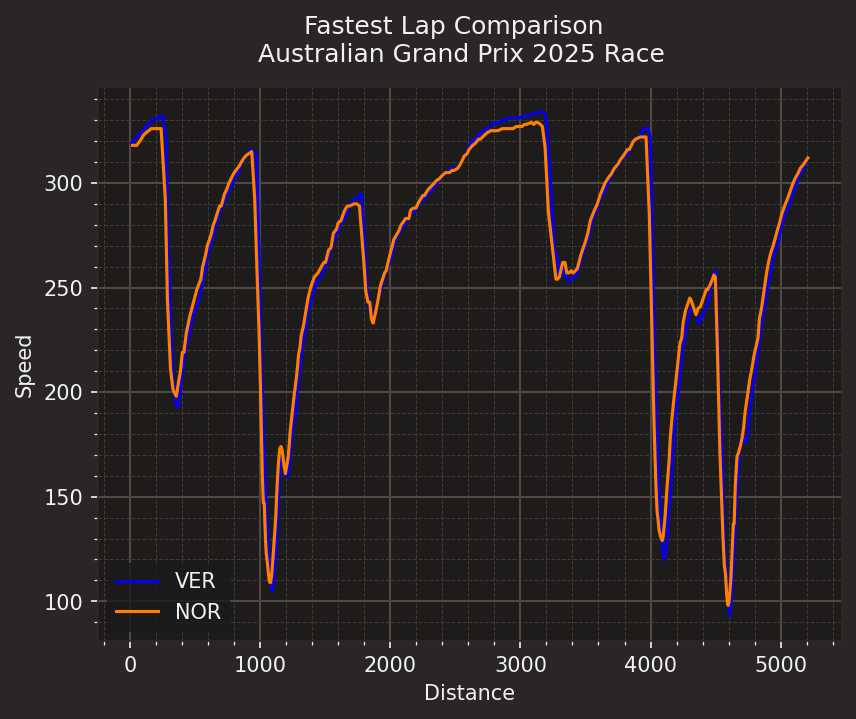

In [28]:
import matplotlib.pyplot as plt

def get_fastests_d_v(driver, session):
    fast = session.laps.pick_drivers(driver).pick_fastest()
    car_data = fast.get_car_data().add_distance()
    d = car_data['Distance']
    v = car_data['Speed']
    return d, v

ver_d, ver_v = get_fastests_d_v('VER', session)
nor_d, nor_v = get_fastests_d_v('NOR', session)
lec_d, lec_v = get_fastests_d_v('LEC', session)

rbr_color = fastf1.plotting.get_team_color('Redbull', session)
mcl_color = fastf1.plotting.get_team_color('McLaren', session)
fer_color = fastf1.plotting.get_team_color('Ferrari', session)

fig, ax = plt.subplots()
ax.plot(ver_d, ver_v, color=rbr_color, label='VER')
ax.plot(nor_d, nor_v, color=mcl_color, label='NOR')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Race")

fig.set_dpi(150)
ax.set(xlabel='Distance', ylabel='Speed')

plt.show()